<a href="https://colab.research.google.com/github/nikhilmishra1710/18-10-23_Python_session3/blob/main/18_10_23_Python_session3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CANDLESTICK BASED TRADING STARTEGY BACKTESTING**

Candlestick-based trading strategy backtesting refers to the process of evaluating a trading strategy using historical price data to see how it would have performed in the past. In the context of candlestick patterns, it involves analyzing historical candlestick patterns and their associated trading signals to assess the effectiveness and profitability of the strategy.

Here's a breakdown of the terms:

**Candlestick-Based Trading Strategy**: Candlestick patterns are graphical representations of price movements in a certain time period. Traders use these patterns to make trading decisions. For example, a bullish engulfing pattern occurs when a small bearish candle is followed by a larger bullish candle, suggesting a potential bullish reversal. Traders can develop strategies based on these patterns.

**Backtesting**: Backtesting is the process of applying a trading strategy to historical price data to see how it would have performed in the past. It involves running the strategy using historical data to generate hypothetical buy and sell signals. By doing this, traders can assess the strategy's effectiveness, profitability, and risk levels over historical periods.

##Before we dive into Candlestick-based trading strategy let us explore what does the candle represent



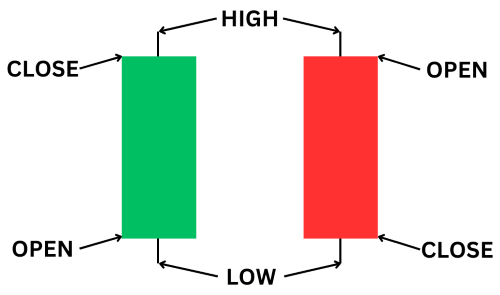


We would be learning about three single candlestick patterns:
1. Hammer and Hanging Man
2. Inverted Hammer and Shooting Star
3. Dragonfly Doji and Gravestone Doji
4. Marubuzo


Before we dive into any candlestick pattern backset let us first get our dataset and required libraries ready
For this we will be using:
1. yfinance
2. vectorbt
3. talib
4. pandas
5. mplfinance

#**Installing all the required libraries**

In [31]:
!pip install yfinance vectorbt pandas mplfinance

In [32]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

#This process takes about 2-3 min or more depending on internet connection

--2023-10-17 17:42:52--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-10-17 17:42:53--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-10-17 17:42:53--  http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving nchc.dl.sourceforge.n

#**Let us first get the stock data of Google in the time interval 01-01-2022 to 01-10-2023**

In [ ]:
import yfinance as yf

ticker=yf.Ticker("GOOG")

data=ticker.history(
    start="2020-01-01",
    end="2022-10-01"
)

data=data[["Open","High","Low","Close"]]    #Trim the data to the required columns

data

Importing the required libraries

In [34]:
import vectorbt as vbt
import talib
import pandas as pd         #required if we are reading data from a csv file
import mplfinance as mpf

Let us see the candle stick chart for the data

In [ ]:
mpf.plot(data, type='candle', style='yahoo', title='Candlestick Trading Strategy Backtest', ylabel='Price', ylabel_lower='Volume', show_nontrading=True)

# **HAMMER AND HANGING MAN**



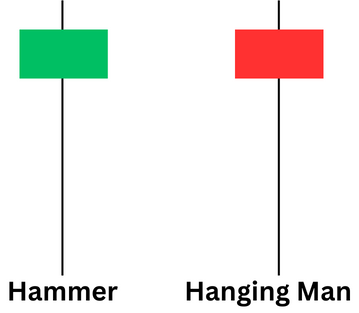

##Now let's see this in a candlestick chart
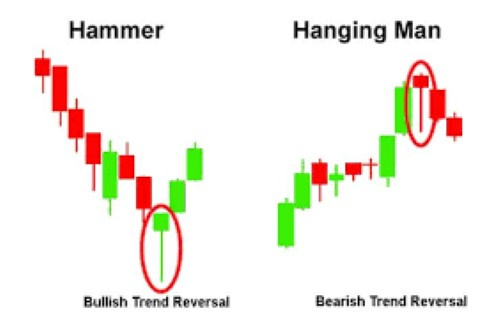


## CODE IMPLEMENTATION

In [ ]:
hammer=talib.CDLHAMMER(data.Open,data.High,data.Low,data.Close)
hammer

In [ ]:
hanging_man=talib.CDLHANGINGMAN(data.Open,data.High,data.Low,data.Close)
hanging_man

In [ ]:
print(hammer[hammer==100])

In [ ]:
print(hanging_man[hanging_man==-100])

In [ ]:

temp=ticker.history(
    start="2020-07-01",
    end="2020-08-01"
)

temp=temp[["Open","High","Low","Close"]]

mpf.plot(temp, type='candle', style='yahoo', title='Candlestick Trading Strategy Backtest', ylabel='Price', ylabel_lower='Volume', show_nontrading=True)

In [13]:
buys= (hammer==100)
sells = (hanging_man==-100)

In [ ]:
pf=vbt.Portfolio.from_signals(data.Close,buys,sells)
print(pf.stats())
pf.plot().show()

# **INVERTED HAMMER AND SHOOTING STAR**

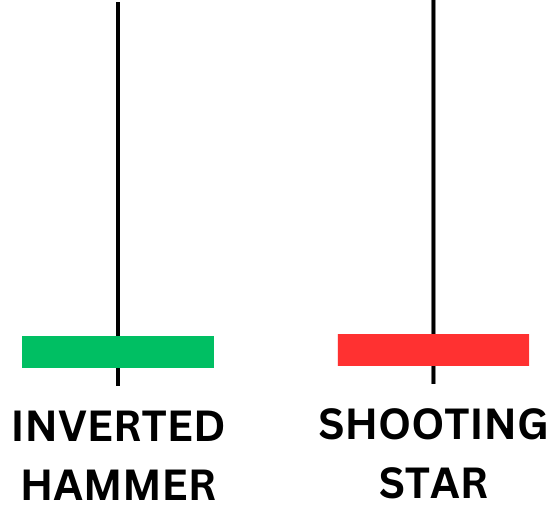

## Let's see this in a candlestick chart

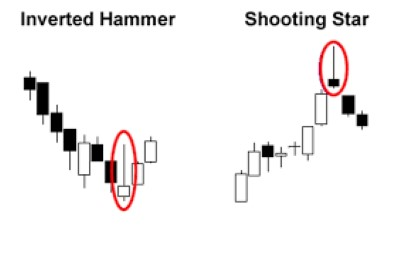

## CODE IMPLEMENTATION

In [15]:
inverted_hammer=talib.CDLINVERTEDHAMMER(data.Open,data.High,data.Low,data.Close)
inverted_hammer

Date
2020-01-02 00:00:00-05:00      0
2020-01-03 00:00:00-05:00      0
2020-01-06 00:00:00-05:00      0
2020-01-07 00:00:00-05:00      0
2020-01-08 00:00:00-05:00      0
                            ... 
2022-09-26 00:00:00-04:00    100
2022-09-27 00:00:00-04:00      0
2022-09-28 00:00:00-04:00      0
2022-09-29 00:00:00-04:00      0
2022-09-30 00:00:00-04:00      0
Length: 693, dtype: int32

In [16]:
shooting_star=talib.CDLSHOOTINGSTAR(data.Open,data.High,data.Low,data.Close)
shooting_star

Date
2020-01-02 00:00:00-05:00    0
2020-01-03 00:00:00-05:00    0
2020-01-06 00:00:00-05:00    0
2020-01-07 00:00:00-05:00    0
2020-01-08 00:00:00-05:00    0
                            ..
2022-09-26 00:00:00-04:00    0
2022-09-27 00:00:00-04:00    0
2022-09-28 00:00:00-04:00    0
2022-09-29 00:00:00-04:00    0
2022-09-30 00:00:00-04:00    0
Length: 693, dtype: int32

In [17]:
print(inverted_hammer[inverted_hammer==100])

Date
2020-03-12 00:00:00-04:00    100
2020-09-08 00:00:00-04:00    100
2020-10-15 00:00:00-04:00    100
2020-11-12 00:00:00-05:00    100
2021-02-09 00:00:00-05:00    100
2021-02-22 00:00:00-05:00    100
2021-04-30 00:00:00-04:00    100
2021-08-18 00:00:00-04:00    100
2021-08-26 00:00:00-04:00    100
2021-10-11 00:00:00-04:00    100
2022-05-11 00:00:00-04:00    100
2022-05-19 00:00:00-04:00    100
2022-06-09 00:00:00-04:00    100
2022-06-13 00:00:00-04:00    100
2022-07-13 00:00:00-04:00    100
2022-08-17 00:00:00-04:00    100
2022-08-23 00:00:00-04:00    100
2022-09-26 00:00:00-04:00    100
dtype: int32


In [18]:
print(shooting_star[shooting_star==-100])

Date
2020-01-22 00:00:00-05:00   -100
2020-05-05 00:00:00-04:00   -100
2020-07-02 00:00:00-04:00   -100
2020-08-13 00:00:00-04:00   -100
2020-10-16 00:00:00-04:00   -100
2020-11-11 00:00:00-05:00   -100
2021-01-21 00:00:00-05:00   -100
2021-03-31 00:00:00-04:00   -100
2021-06-24 00:00:00-04:00   -100
2021-07-14 00:00:00-04:00   -100
2021-08-30 00:00:00-04:00   -100
2021-12-23 00:00:00-05:00   -100
2022-02-09 00:00:00-05:00   -100
2022-06-06 00:00:00-04:00   -100
2022-08-10 00:00:00-04:00   -100
dtype: int32


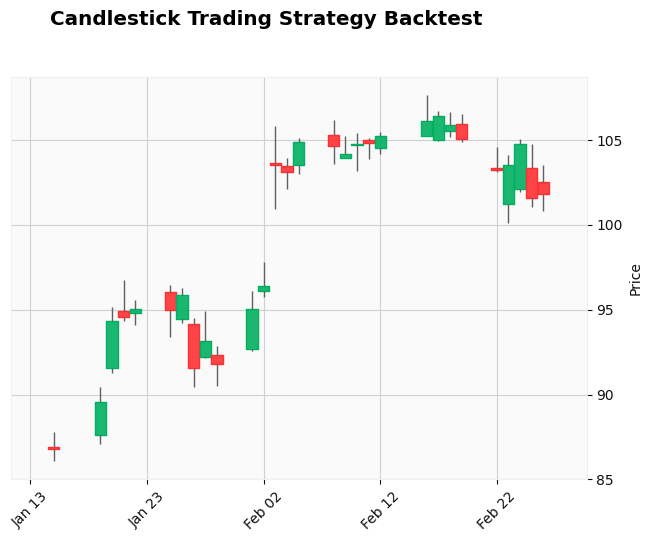

In [19]:
temp=ticker.history(
    start="2021-01-15",
    end="2021-02-28"
)

temp=temp[["Open","High","Low","Close"]]

mpf.plot(temp, type='candle', style='yahoo', title='Candlestick Trading Strategy Backtest', ylabel='Price', ylabel_lower='Volume', show_nontrading=True)

In [20]:
buys= (inverted_hammer==100)
sells = (shooting_star==-100)

In [21]:
pf=vbt.Portfolio.from_signals(data.Close,buys,sells)
print(pf.stats())
pf.plot().show()

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2020-01-02 00:00:00-05:00
End                           2022-09-30 00:00:00-04:00
Period                                              693
Start Value                                       100.0
End Value                                    137.102456
Total Return [%]                              37.102456
Benchmark Return [%]                          40.634944
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              20.445142
Max Drawdown Duration                             133.0
Total Trades                                         10
Total Closed Trades                                   9
Total Open Trades                                     1
Open Trade PnL                               -34.464546
Win Rate [%]                                  88.888889
Best Trade [%]                                21.185563
Worst Trade [%]                               -0

# **DRAGONFLY DOJI AND GRAVESTONE DOJI**

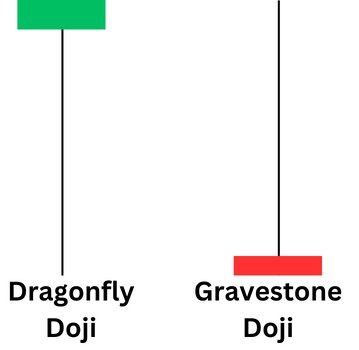

## Let's take a look at a candlestick chart
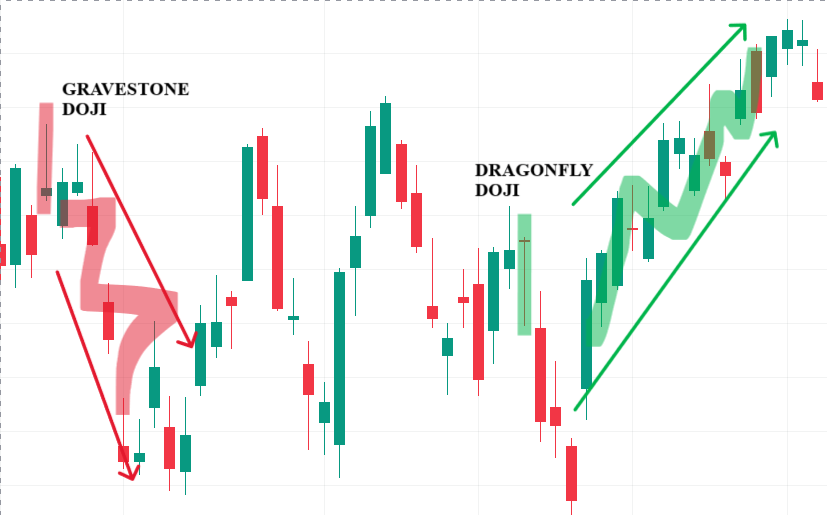

##CODE IMPLEMENTATION

In [ ]:
dragonfly=talib.CDLDRAGONFLYDOJI(data.Open,data.High,data.Low,data.Close)
dragonfly

In [ ]:
gravestone=talib.CDLGRAVESTONEDOJI(data.Open,data.High,data.Low,data.Close)
gravestone

In [ ]:
print(dragonfly[dragonfly==100])

In [ ]:
print(gravestone[gravestone==100])

In [ ]:
temp=ticker.history(
    start="2021-01-01",
    end="2021-02-28"
)

temp=temp[["Open","High","Low","Close"]]

mpf.plot(temp, type='candle', style='yahoo', title='Candlestick Trading Strategy Backtest', ylabel='Price', ylabel_lower='Volume', show_nontrading=True)

In [27]:
buys= (dragonfly==100)
sells = (gravestone==100)

In [ ]:
pf=vbt.Portfolio.from_signals(data.Close,buys,sells)
print(pf.stats())
pf.plot().show()

#**BULLISH MARUBOZU AND BEARISH MARUBOZU**

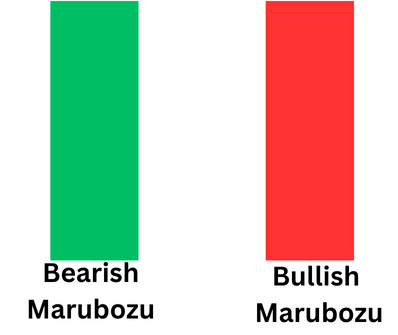

##Let's Look at a candlestick chart

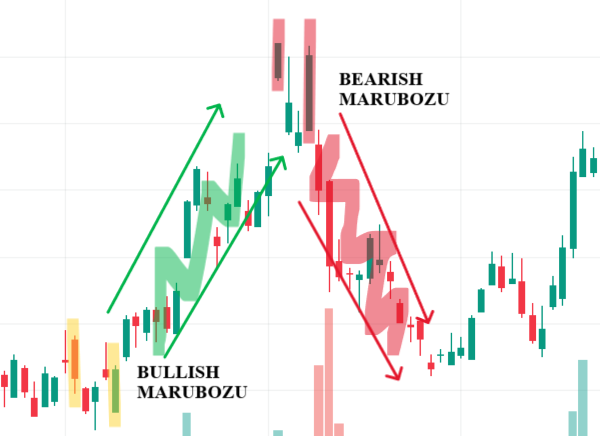

##CODE IMPLEMENTATION

In [ ]:
marubozu=talib.CDLMARUBOZU(data.Open,data.High,data.Low,data.Close)
marubozu

In [ ]:
print(marubozu[marubozu==100])

In [ ]:
print(marubozu[marubozu==-100])

In [ ]:
temp=ticker.history(
    start="2021-04-01",
    end="2021-04-30"
)

temp=temp[["Open","High","Low","Close"]]

mpf.plot(temp, type='candle', style='yahoo', title='Candlestick Trading Strategy Backtest', ylabel='Price', ylabel_lower='Volume', show_nontrading=True)

In [ ]:
buys=(marubozu==100)
sells=(marubozu==-100)

pf=vbt.Portfolio.from_signals(data.Close,buys,sells)
print(pf.stats())
pf.plot().show()